In [9]:
# We import the packages; kmeans for clustering, matplotlib for plotting, numpy and cv2 for image analysis.

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
#Counter allows to calculate frequencies efficiently and skimage helps for image optimization (not used yet in code). 
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

In [42]:
def fib(n):
    if n < 2:
        print("Please input an argument greater than 2.")
    F=[0,1]
    for i in range(2,n):
        F.append(F[i-1]+F[i-2])
    return F
fib(10)
        

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

# Images in Python.


The following examples are done using an image found in google. We start by using the cv2 package to load the image onto Python; this package loads the image as a 3D numpy array but instead of RGB it's loaded as BGR (Blue, Green, Red) so we need to either flip it using cv2's commands or by flipping the indexes as it's done in the example.

By the way; it will be useful to explain how hsv and rgb work to the students so that they know which format might be more convinient for certain applications.

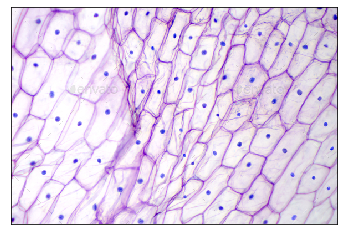

In [3]:
img = cv2.imread('Onion.jpg')
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.xticks([]), plt.yticks([]) 
plt.imshow(img[:,:,::-1])
plt.show()


Here is a split based on hsv; the saturation image shows a strong distinction of the edges.

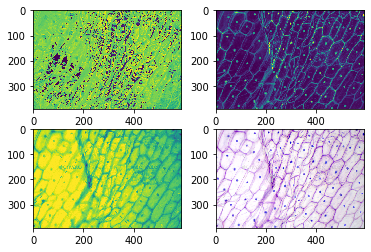

In [4]:
h,s,v = cv2.split(img_hsv)
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(h)
axarr[0,1].imshow(s)
axarr[1,0].imshow(v)
axarr[1,1].imshow(img[:,:,::-1])
plt.show()

Same thing done with rgb.

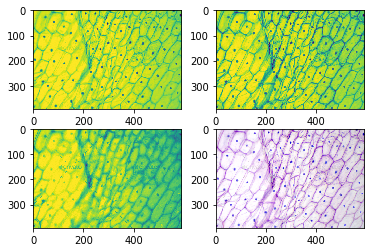

In [5]:
b,g,r = cv2.split(img)
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(r)
axarr[0,1].imshow(g)
axarr[1,0].imshow(b)
axarr[1,1].imshow(img[:,:,::-1])
plt.show()

After showing images, now we can see in more detail the format in which they're kept.

In [6]:
print(np.shape(img))
print(img[0:10,0:10,:])

(393, 590, 3)
[[[248 237 245]
  [249 238 246]
  [250 240 246]
  [250 241 244]
  [250 241 244]
  [250 239 247]
  [249 238 248]
  [249 238 246]
  [249 239 245]
  [250 240 246]]

 [[246 238 245]
  [246 238 245]
  [246 238 245]
  [248 237 245]
  [249 238 248]
  [247 236 246]
  [249 235 246]
  [248 234 245]
  [246 234 246]
  [247 235 247]]

 [[247 240 245]
  [246 239 244]
  [248 237 245]
  [245 233 245]
  [244 231 245]
  [244 232 244]
  [249 235 247]
  [251 234 247]
  [249 235 246]
  [250 236 247]]

 [[247 239 246]
  [248 237 245]
  [247 236 246]
  [247 235 247]
  [248 236 248]
  [248 239 249]
  [249 238 246]
  [251 240 248]
  [250 239 247]
  [252 239 247]]

 [[246 239 246]
  [247 239 246]
  [247 239 246]
  [248 240 247]
  [250 243 250]
  [249 242 249]
  [248 242 247]
  [247 241 246]
  [249 242 247]
  [251 241 247]]

 [[247 242 244]
  [247 241 246]
  [247 241 246]
  [248 243 245]
  [249 244 246]
  [250 244 249]
  [249 242 249]
  [249 242 249]
  [249 243 248]
  [250 243 248]]

 [[248 241 246

A small exercise using list comprehensions to extract each channel from the image. The np.array command isn't really needed but it's useful if we need to apply a mask to the image or other additional operations.

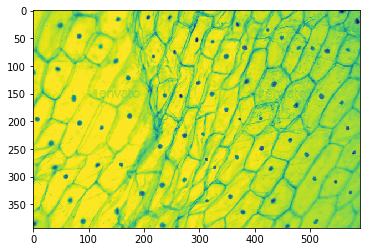

In [7]:
Red=[[pixel[2] for pixel in row] for row in img]
Green=[[pixel[1] for pixel in row] for row in img]
Blue=[[pixel[0] for pixel in row] for row in img]
np.array(Red)
plt.imshow(Red)
plt.show()

This here is a small code used to obtain a color pie chart showing the proportion of colors dominating the image. First a function is made that transforms an RGB color to its corresponding hex code; then, a function that takes as an input an image and number of colors (clusters) to generate said number of clusters using kmeans. Then the centers are extracted from the clustering object and shown in the pie chart. An implementation of using only 3 clusters is shown after the function definition.

In [8]:

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

def color(image,number_of_colors,show_chart=True):
    modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)

    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
        plt.show()
    return rgb_colors

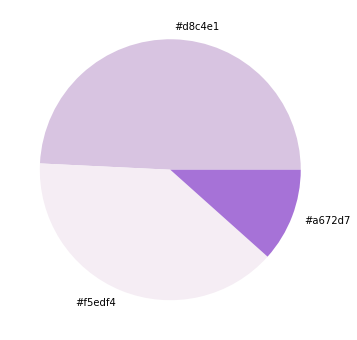

In [9]:
colors=color(img[:,:,::-1],3,True)

Underneath is an example of a color histogram using iterations. It shows which values of the RGB spectrum are favoured (we expect a dominance of high values given the light tone of the color).

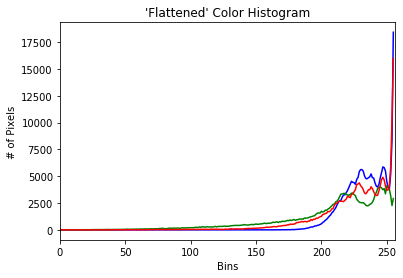

In [10]:
chans = cv2.split(img)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
features = []
 
# loop over each rgb channel
for (chan, color) in zip(chans, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    features.extend(hist)
 
    # plot the histogram
    plt.plot(hist, color = color)
    plt.xlim([0, 256])


## Cell Colonies growth characterization (basic).
In this trial image we can see the cell colonies that are forming within 6 different petri dishes. What we're interested in is to apply feature extraction to the images and recover a quantitative measure of how much have the colonies developed in each dish. We begin by loading the image and showing its respective pixel size; remember that the dimension with a value of 3 corresponds to each of the RGB images.

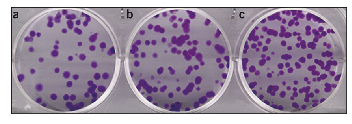

(555, 850, 3)


In [11]:
img2 = cv2.imread('Colonies.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.xticks([]), plt.yticks([]) 
plt.imshow(img2[0:270,:,:])
plt.show()
print(np.shape(img2))

Once we have a basic notion of how the image looks; we can filter the channels both in RGB and HSV to see which one favours the feature extraction of our interest (extracting the purple things from the dishes without considering much else).

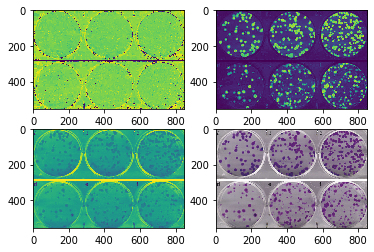

207

In [12]:
h,s,v = cv2.split(cv2.cvtColor(img2,cv2.COLOR_RGB2HSV))
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(h)
axarr[0,1].imshow(s)
axarr[1,0].imshow(v)
axarr[1,1].imshow(img2)
plt.show()
np.max(s)

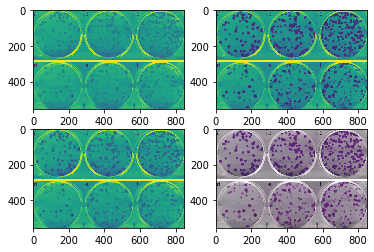

In [13]:
b,g,r = cv2.split(img2)
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(r)
axarr[0,1].imshow(g)
axarr[1,0].imshow(b)
axarr[1,1].imshow(img2)
plt.show()

After viewing all 6 different channels; we must make a choice on which channels seem the most useful to filter the cell colonies. It can range from 1 to all 6 of them but we can see that the highest contrast is achieved by using the green or the saturation channel. 

Now we can apply a mask filter to the image in order to filter exclusively the bacterial growth using only the saturation channel of the image. We begin by applying a condition such that only the bacterial colonies remain.

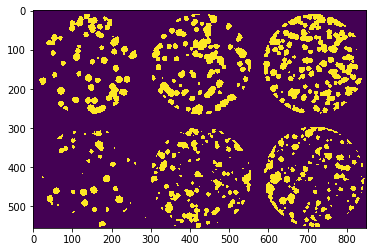

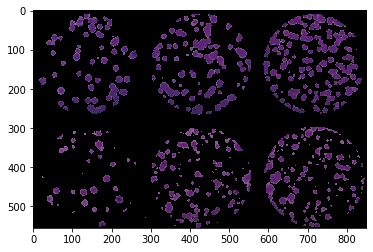

In [14]:
lower = (80)
upper = (255) # Hue (0 to 179), Saturation (0 to 255), Value (0 to 255)
mask = cv2.inRange(s, lower, upper)
plt.figure()
plt.imshow(mask)
masked_img2 = cv2.bitwise_and(img2, img2, mask = mask)
plt.figure()
plt.imshow(masked_img2)

(555, 850)


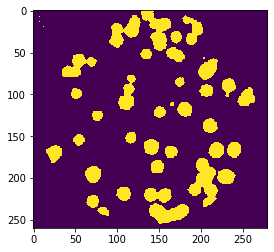

In [35]:
plt.imshow(mask[10:270,:280])
print(np.shape(mask))

With this we have determined the diameter of the petri dish (260 pixels) so the area yields approximately $125*125*\pi$ pixels. We can use a simple boolean comparison to analyze the percentage of the petri dish covered by cell colonies; by looking at the image of all 6 dishes we would expect dish c to have the highest percentage value whilst dish d would have the lowest one. 

In [36]:
im=[mask[10:270,:280],mask[10:270,280:570],mask[10:270,570:],mask[290:,:280],mask[290:,280:570],mask[290:,570:]]
CA=125*125*np.pi
G=[100*np.sum(dish==255)/CA for dish in im]
print(G)

[22.806266725296236, 30.635162037963806, 40.44827385714665, 9.161213172278444, 21.80600973895229, 24.411567143298328]


In [14]:
#Bacteria example
import os
files=os.listdir("Bact")
print(files)
Growth=np.array([np.sum(cv2.imread("Bact/"+image) > 100) for image in files])
print(Growth)

['colony_growth_00.tif', 'colony_growth_01.tif', 'colony_growth_02.tif', 'colony_growth_03.tif', 'colony_growth_04.tif', 'colony_growth_05.tif', 'colony_growth_06.tif', 'colony_growth_07.tif', 'colony_growth_08.tif', 'colony_growth_09.tif', 'colony_growth_10.tif', 'colony_growth_11.tif', 'colony_growth_12.tif', 'colony_growth_13.tif', 'colony_growth_14.tif', 'colony_growth_15.tif', 'colony_growth_16.tif', 'colony_growth_17.tif', 'colony_growth_18.tif', 'colony_growth_19.tif', 'colony_growth_20.tif', 'colony_growth_21.tif', 'colony_growth_22.tif', 'colony_growth_23.tif', 'colony_growth_24.tif', 'colony_growth_25.tif', 'colony_growth_26.tif', 'colony_growth_27.tif', 'colony_growth_28.tif', 'colony_growth_29.tif', 'colony_growth_30.tif', 'colony_growth_31.tif', 'colony_growth_32.tif', 'colony_growth_33.tif', 'colony_growth_34.tif', 'colony_growth_35.tif', 'colony_growth_36.tif']
[ 3594  2541  2598  2301  2661  4269  3876  5238  3996  3804  4137  4434
  4722  5352  5997  6177  6738  7146  

This returns a list containing the amount of glowing pixels (location of cell colonies) over the total dish area which gives a quantitative value of the growth. 

['colony_growth_00.tif', 'colony_growth_01.tif', 'colony_growth_02.tif', 'colony_growth_03.tif', 'colony_growth_04.tif', 'colony_growth_05.tif', 'colony_growth_06.tif', 'colony_growth_07.tif', 'colony_growth_08.tif', 'colony_growth_09.tif', 'colony_growth_10.tif', 'colony_growth_11.tif', 'colony_growth_12.tif', 'colony_growth_13.tif', 'colony_growth_14.tif', 'colony_growth_15.tif', 'colony_growth_16.tif', 'colony_growth_17.tif', 'colony_growth_18.tif', 'colony_growth_19.tif', 'colony_growth_20.tif', 'colony_growth_21.tif', 'colony_growth_22.tif', 'colony_growth_23.tif', 'colony_growth_24.tif', 'colony_growth_25.tif', 'colony_growth_26.tif', 'colony_growth_27.tif', 'colony_growth_28.tif', 'colony_growth_29.tif', 'colony_growth_30.tif', 'colony_growth_31.tif', 'colony_growth_32.tif', 'colony_growth_33.tif', 'colony_growth_34.tif', 'colony_growth_35.tif', 'colony_growth_36.tif']


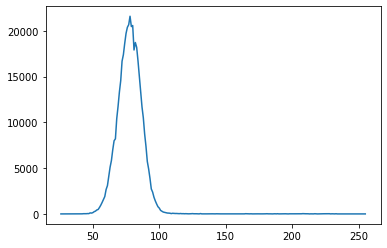

In [16]:
# Generate a code that stores the name of the files in a list.
List=["colony_growth_"]*37
for i in range(0,37):
    if i < 10:
        List[i]=List[i]+"0"+str(i)+".tif"
    else:
        List[i]=List[i]+str(i)+".tif"
print(List)
#Generate a color histogram of one image
imu=cv2.imread("Bact/"+List[0])
x,y = np.unique(imu, return_counts=True)
plt.plot(x,y)
plt.show()
#This shows the image is predominantly dark, a good thresehold is under 120
Filt=imu